# APS360 Project

Obtained the MTSD by applying for access through: https://www.mapillary.com/dataset/trafficsign


## Part 1 - Cropping the Images

**If you are using the .zip files from the Google drive you can skip this step**

Images in the `mtsd_fully_annotated` (original) dataset are not cropped and so we need to crop them.
Each of the files should have a corresponding .json file containing the annotations.


In [ ]:
from PIL import Image
import json
import glob
import os

def get_pil_box(bbox):
    return (bbox["xmin"], bbox["ymin"], bbox["xmax"], bbox["ymax"])

# Edit these two variable to control the input and output directories
mtsd_root = ".../mtsd_fully_annotated" # Path to root of original files
out_root = ".../APS360-Project/dataset" # Directory to output to (will be created if it doesnt exist)

json_root = os.path.join(mtsd_root, "annotations/")

missing_file_count = 0
total_file_count = 0
for imagefile in glob.glob(os.path.join(mtsd_root, "images/*.jpg")):
    total_file_count += 1
    # Only print every 100 lines
    if total_file_count % 100 == 0:
        print(total_file_count)
    
    name, _ = os.path.splitext(os.path.basename(imagefile))
    img = Image.open(imagefile)

    try:
        with open(os.path.join(json_root, name + ".json")) as jsonfile:
            annotations = json.load(jsonfile)

        for obj in annotations["objects"]:
            key = obj["key"]
            label = obj["label"]
            crop = img.crop(get_pil_box(obj["bbox"]))
            
            out_dir = os.path.join(out_root, label)
            os.makedirs(out_dir, exist_ok=True)
            crop.save(os.path.join(out_dir, key + ".jpg"))
    except FileNotFoundError:
        # print("Warning: %s skipped because .json may not exist" % imagefile)
        missing_file_count += 1
    except Exception as e:
        print("Error: %s" % e)

print("Number of files without .jsons {} which is {}%".format(missing_file_count, missing_file_count/total_file_count))

Error: tile cannot extend outside image
Number of files without .jsons 8 which is 0.1509433962264151%


## Part 2 - Analysis of Regulatory Images

From the `mtsd_fully_connected`, filter out all files except for images with signs that are classified as `regulatory`.


### Part 2a - Where is the Dataset?

There are two version of code below to load the dataset, you can either:
1. Download from Google Drive (Use if you are using Google Colab)
2. Set the `root_path` to the root of where a folder named `regulatory` exists. It is default to the same diretory your `project.ipynb` (this file) is located. (Use if you are running on localhost/Jupyter)

#### Version 1
Download from Google drive

In [ ]:
!pip install gdown
!gdown --id 1CQ_RMDQrVYXDiYl2mH6MjEASupbZVJa1 --output unique_dataset.zip
!unzip -q -o unique_dataset.zip
root_path = "/content"

Downloading...
From: https://drive.google.com/uc?id=1CQ_RMDQrVYXDiYl2mH6MjEASupbZVJa1
To: /content/unique_dataset.zip
109MB [00:01, 96.8MB/s]


#### Version 2
Set `root_path` to where the unique_dataset folder is located or leave it alone to use the current directory your notebook is in.

In [ ]:
root_path = "."

### Part 2b - Statistics for Dataset

<BarContainer object of 88 artists>

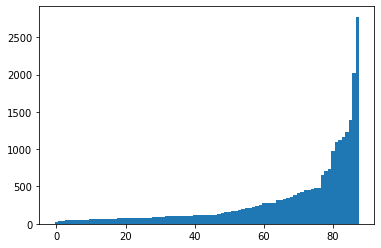

In [ ]:
# plot histogram of all classes in cropped dataset
import matplotlib.pyplot as plt
import os

dataset_folder = os.path.join(root_path, "unique_dataset/regulatory")
reg_classes = os.listdir(dataset_folder)

class_counts = {}
class_samples = {}

for i, class_dir in enumerate(reg_classes):
    fl = os.path.join(dataset_folder, class_dir)
    fl_size = len(os.listdir(fl))

    class_counts[class_dir] = fl_size

    for fi in os.listdir(fl):
        class_samples[class_dir] = os.path.join(fl, fi)
        break

max_class = max(class_counts, key=class_counts.get)
min_class = min(class_counts, key=class_counts.get)

plt.bar(range(len(class_counts)), sorted(class_counts.values()), 1)

Highest count class is: regulatory--yield--g1 with 2775 items


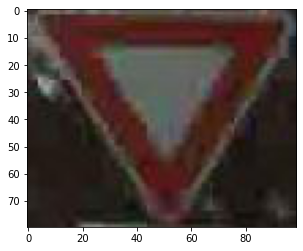

In [ ]:
print("Highest count class is: {} with {} items".format(max_class, class_counts[max_class]))
plt.imshow(plt.imread(class_samples[max_class]))

Lowest count class is: regulatory--shared-path-bicycles-and-pedestrians--g1 with 20 items


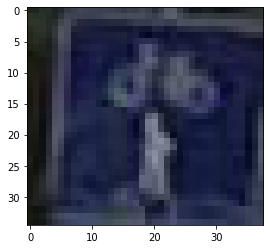

In [ ]:
print("Lowest count class is: {} with {} items".format(min_class, class_counts[min_class]))
plt.imshow(plt.imread(class_samples[min_class]))

In [ ]:
# check all the classes count
for class_name in sorted(class_counts, key=class_counts.get):
    print("{:60} {} images".format(class_name, class_counts[class_name]))

regulatory--shared-path-bicycles-and-pedestrians--g1         20 images
regulatory--end-of-no-parking--g1                            37 images
regulatory--road-closed-to-vehicles--g1                      40 images
regulatory--passing-lane-ahead--g1                           47 images
regulatory--maximum-speed-limit-led-80--g1                   50 images
regulatory--dual-lanes-go-straight-on-right--g1              50 images
regulatory--stop-signals--g1                                 50 images
regulatory--no-buses--g3                                     51 images
regulatory--triple-lanes-turn-left-center-lane--g1           51 images
regulatory--end-of-maximum-speed-limit-70--g1                57 images
regulatory--do-not-block-intersection--g1                    58 images
regulatory--parking-restrictions--g2                         58 images
regulatory--end-of-bicycles-only--g1                         58 images
regulatory--no-motor-vehicles-except-motorcycles--g1         58 images
regula

## Part 3 - Data Augmentation

In [ ]:
# data augmentation

import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

# pick a random degree of rotation between 25% on the left and 25% on the right
def random_rotation(image_array: ndarray):
    random_degree = random.uniform(-25, 25)
    return sk.transform.rotate(image_array, random_degree)

# add random noise to the image
def random_noise(image_array: ndarray):
    return sk.util.random_noise(image_array)



In [ ]:
# locally split cropped dataset
pip install split_folders

In [ ]:
import split_folders
input_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\unique_dataset\\regulatory'
output_folder = 'C:\\jeremy\\Assignments\\APS360\\Project\\split_unique_datasets'
split_folders.ratio(input_folder, output=output_folder, seed=1337, ratio=(.70, .15, .15))

In [ ]:
# Split uncropped dataset on google colab
!pip install gdown

In [ ]:
# Access denied, will have to do it locally
!gdown --id 1Fjn2RV8BBRZhtiwJA9Wdg-3BMt9Z_pyJ --output regulatory.zip

In [ ]:
# Check num of dataset
import os, os.path
base_dir = 'C:\\jeremy\\Assignments\\APS360\\Project\\Regulatory\\'
print("Annotation files: {}".format(len(os.listdir(base_dir+'annotations'))))
print("image files: {}".format(len(os.listdir(base_dir+'images'))))
print(os.listdir(base_dir+'annotations')[0])
print(os.listdir(base_dir+'images')[0])

Annotation files: 18027
image files: 18027
--7fWq6WjZM8L1eUSuvOEA.json
--7fWq6WjZM8L1eUSuvOEA.jpg


In [ ]:
# split uncropped images
import os
from glob import glob
import shutil
from sklearn.model_selection import train_test_split

# find all image file names
image_files = glob(base_dir+'images\\*.jpg')
image_names = [name.replace(".jpg","").split('\\')[-1] for name in image_files]

# split names into 70% train, 15% val and 15% test
train_names, test_names = train_test_split(image_names, test_size=0.3,random_state=1)
val_names, test_names = train_test_split(test_names, test_size=0.5,random_state=1)
print(f'Train: {len(train_names)}, Val: {len(val_names)}, Test: {len(test_names)}')

Train: 12618, Val: 2704, Test: 2705


In [ ]:
# split the files
def move_files(file_names, source_path, destination_path):
    # create dir if not exist
    if not os.path.exists(destination_path):
        os.makedirs(destination_path)
    if not os.path.exists(destination_path+'images'):
        os.makedirs(destination_path+'images')
    if not os.path.exists(destination_path+'annotations'):
        os.makedirs(destination_path+'annotations')
    
    # move images with given name
    for fi in file_names:
         image = fi+'.jpg'
         json = fi+'.json'
         
         shutil.move(os.path.join(source_path+'images', image), 
                     os.path.join(destination_path+'images', image))
         shutil.move(os.path.join(source_path+'annotations', json),
                     os.path.join(destination_path+'annotations', json))
    return

source_path = base_dir
destination_path = 'C:\\jeremy\\Assignments\\APS360\\Project\\split_regulatory_dataset\\'
move_files(train_names,source_path,(destination_path+'train\\'))
move_files(val_names,source_path,(destination_path+'val\\'))
move_files(test_names,source_path,(destination_path+'test\\'))

In [ ]:
print("Train files: {}".format(len(os.listdir(destination_path+'train/images'))))
print("Val files: {}".format(len(os.listdir(destination_path+'val/images'))))
print("Test files: {}".format(len(os.listdir(destination_path+'test/images'))))

Train files: 12618
Val files: 2704
Test files: 2705


In [ ]:
# Create a zip if using Colab
!zip -r '/root/split_uncropped_dataset' -v '/root'

# Sign Detection Code

This part converts Mapillary annotations to YOLO annotations
Please see YOLOv3 Code in the Project directory on GDrive for training.

In [ ]:
import csv
import numpy as np
import random
import torch
import torch.utils.data as data
from torch import nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
from torchvision import datasets, transforms

import os
import os.path

import json

from PIL import Image


In [ ]:
!pip install gdown
!gdown --id 1In9drHiS5rgA3KUEFJYmHPAjJxB7gpqo --output sample.zip 

Downloading...
From: https://drive.google.com/uc?id=1In9drHiS5rgA3KUEFJYmHPAjJxB7gpqo
To: /content/sample.zip
100% 157k/157k [00:00<00:00, 22.8MB/s]


In [ ]:
!unzip sample.zip

Archive:  sample.zip
   creating: Sample_480/
   creating: Sample_480/annotations/
  inflating: Sample_480/annotations/79yoU5Wj9QOrBhX44AlDbw.json  
  inflating: Sample_480/annotations/9dCNXM_vfBrFOxSatT_GCw.json  
  inflating: Sample_480/annotations/d9DDXXHYoHpQlprTAy3EFg.json  
  inflating: Sample_480/annotations/IgNlFBYwJjzaI49nA5oLRQ.json  
  inflating: Sample_480/annotations/rI8un1roccPLAY7Elwe53g.json  
   creating: Sample_480/images/
  inflating: Sample_480/images/79yoU5Wj9QOrBhX44AlDbw.jpg  
  inflating: Sample_480/images/9dCNXM_vfBrFOxSatT_GCw.jpg  
  inflating: Sample_480/images/d9DDXXHYoHpQlprTAy3EFg.jpg  
  inflating: Sample_480/images/IgNlFBYwJjzaI49nA5oLRQ.jpg  
  inflating: Sample_480/images/rI8un1roccPLAY7Elwe53g.jpg  


In [ ]:
class AnnotationDataSet(data.Dataset):
    def __init__(self, path_to_imgs, path_to_json, transform = None):
        self.path_to_imgs = path_to_imgs
        self.path_to_json = path_to_json
        self.image_ids = os.listdir(path_to_imgs)
        self.transform = transform

    def __getitem__(self, idx):
        img_id = self.image_ids[idx]
        img_id = os.path.splitext(img_id)[0]
        img = Image.open(os.path.join(self.path_to_imgs, img_id + ".jpg"))
        json_file = json.load(open(os.path.join(self.path_to_json, img_id + ".json")))


        if self.transform:
            img = self.transform(img)

        return img, json_file, img_id

    def __len__(self):
        return len(self.image_ids)

In [ ]:
#Load the dataset
sample_set = AnnotationDataSet("Sample_480/images", "Sample_480/annotations", transform=transforms.ToTensor())
#sample_set = AnnotationDataSet("Small_Sample/images", "Small_Sample/annotations")

In [ ]:
def construct_YOLO_labels (json_file, img_width, img_height):

  #Checks all annotations in the JSON file, convert to YOLO annotations

  label = np.zeros([len(json_file["objects"]), 5])
  count = 0;

  for i in json_file["objects"]:

    x_center = (i["bbox"]['xmax'] - i["bbox"]['xmin'])/2 +  i["bbox"]['xmin']
    y_center = (i["bbox"]['ymax'] - i["bbox"]['ymin'])/2 + i["bbox"]['ymin']

    x_center = x_center / img_width
    y_center = y_center / img_height

    width = (i["bbox"]['xmax'] - i["bbox"]['xmin']) / img_width 
    height = (i["bbox"]['ymax'] - i["bbox"]['ymin']) / img_height

    label[count] = np.array([0, x_center, y_center, width, height])
    count += 1
    


  return label

In [ ]:
#Mounting drive
from google.colab import drive

#Mount the drive where you want to store the YOLOv3 annotations
drive.mount('/content/drive')
%cd /content/drive/"My Drive"/APS360/yolo_annotations/test

In [ ]:
#Write Yolo Annotations to textfile.
#Copy the text file into the SAME folder as the images for training YoloV3

for img, json_file, img_id in iter(sample_set):
  #print (img.shape)
  label = construct_YOLO_labels(json_file, img.shape[2], img.shape[1])
  newline = 0
  file_name = img_id + ".txt"
  file = open(file_name, "w") 
  for i in label:
    if (newline):
      file.write("\n")
    #print (i)
    str_content = "{0:1d} {1:.6f} {2:.6f} {3:.6f} {4:.6f}".format(int(i[0]), i[1], i[2], i[3], i[4])
    file.write(str_content) 
    newline = 1
  file.close() 
  #print (label)

# Sign Classification

In [1]:
import csv
import numpy as np
import random
import torch
import torch.utils.data as data
from torch import nn
import torch.nn.functional as F
import torch.optim as optim #for gradient descent
from torchvision import datasets, transforms

import os
import os.path

import json

from PIL import Image
import matplotlib.pyplot as plt

import torchvision.models

In [2]:
!pip install gdown
!gdown --id 1EpuzXH38T_yOAOdtDJPFZ7_LXEfnXlCn --output split_uniquified.zip 

Downloading...
From: https://drive.google.com/uc?id=1EpuzXH38T_yOAOdtDJPFZ7_LXEfnXlCn
To: /content/split_uniquified.zip
56.6MB [00:02, 25.0MB/s]


In [3]:
!unzip split_uniquified.zip -d '/root/datasets'

Streaming output truncated to the last 5000 lines.
  inflating: /root/datasets/train/regulatory--yield--g1/hlxqtwt8g3v7q5ha7kddiu.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hn7k7jch8uzpumnetekmzh.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hnajj0m572bnuehz8vnnrx.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hnrnt40texf3e7dazpg2cd.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/ho11sonhpz7vi5q7k4wb5j.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/ho8lnkn2detkrc5at49adqmalm.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/HOdsLL2zTGmFbkneUu_VHA.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hoxln1ewlwgrzx1u3ljdl4.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hp319tlyoi9539r80531o1.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hpkmtq53kr64q2idmhquqh.jpg  
  inflating: /root/datasets/train/regulatory--yield--g1/hpm9z83gb2onzaevblqds3.jpg  
  inflatin

In [4]:
data_transform = transforms.Compose([transforms.RandomResizedCrop(224, scale=(1,1)), 
                                      transforms.ToTensor()])

In [5]:
data_dir = '/root/datasets/'
train_dir = os.path.join(data_dir, 'train/')
val_dir = os.path.join(data_dir, 'val/')

Num training images:  18422
Num validation images:  3918


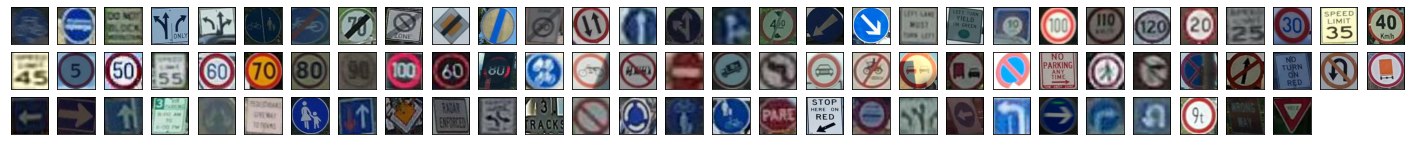

In [6]:
train_data = datasets.ImageFolder(train_dir, transform=data_transform)
val_data = datasets.ImageFolder(val_dir, transform=data_transform)

# print out some data stats
print('Num training images: ', len(train_data))
print('Num validation images: ', len(val_data))

label = -1
count = 0
fig = plt.figure(figsize=(25, 4))

for imgs, labels in train_data:
  if (label < labels ):

    ax = fig.add_subplot(5, 30, count+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(imgs, (1, 2, 0)))
    count += 1
    label = labels

In [7]:
alexnet = torchvision.models.alexnet(pretrained=True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth


In [9]:
from torch.utils.data import TensorDataset
def AlexNet_Features_Convert(data):

  loader = torch.utils.data.DataLoader(data, batch_size=1)
  feature_array = np.empty((len(loader), 256, 6, 6))
  label_array = np.empty((len(loader)))

  n = 0

  for imgs, labels in iter(loader):          
      features = alexnet.features(imgs)  
      #Convert to numpy          
      feature_array[n] = features.detach().numpy()
      label_array[n] = labels.detach().numpy()
      if ((feature_array[n]!=features.detach().numpy()).all()):
        print ("Error!")
        print (feature_array[n])
        print(features.detach().numpy())
        break
      
      n += 1
      
  #convert back to tensor
  tensor_feature_array = torch.Tensor(feature_array)
  tensor_label_array = torch.Tensor(label_array)

  new_dataset = TensorDataset(tensor_feature_array,tensor_label_array)
  #new_dataloader = DataLoader(new_dataset)

  return new_dataset

In [10]:
alex_val_data = AlexNet_Features_Convert(val_data)
alex_train_data = AlexNet_Features_Convert(train_data)

In [11]:
# OLD MODEL
class TransferNet(nn.Module):
    def __init__(self):
        super(TransferNet, self).__init__()
        self.name = "transfer"
        self.conv1 = nn.Conv2d(256, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 4 * 4, 256)
        self.fc2 = nn.Linear(256, 88)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        #print (x.shape)
        x = x.view(-1, 256 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [18]:
# NEW MODEL USE THIS ONE
class SignClassifierNet(nn.Module):
    def __init__(self):
        super(SignClassifierNet, self).__init__()
        self.name = "SignClassifier"
        self.conv1 = nn.Conv2d(256, 256, 3)
        self.conv2 = nn.Conv2d(256, 256, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(256 * 2 * 2, 256)
        self.fc2 = nn.Linear(256, 88)

    def forward(self, x):
        x = F.leaky_relu(self.conv1(x))
        x = F.leaky_relu(self.conv2(x))
        #print (x.shape)
        x = x.view(-1, 256 * 2 * 2)
        x = F.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [13]:
def get_model_name(name, epoch):

    path = "model_{0}_epoch{1}".format(name,
                                        epoch)
    return path

In [14]:
def get_accuracy_and_loss(model, data_loader):
    model.eval() 
    correct, total, num_batch, total_loss = 0, 0, 0, 0

    criterion = nn.CrossEntropyLoss()

    with torch.no_grad():
      for imgs, labels in data_loader: # minibatches
          
        #############################################
        #To Enable GPU Usage
        if use_cuda and torch.cuda.is_available():
          imgs = imgs.cuda()
          labels = labels.cuda()
        #############################################
          
        output = model(imgs)
        loss = criterion(output, labels.long())

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += imgs.shape[0]
        num_batch += 1

    return (correct/total), (loss/num_batch)

In [15]:
import time
def train(model, train_data, val_data, batch_size=64, learning_rate=2e-4, weight_decay = 0, num_epochs=1):
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)

    iters, train_loss, val_loss, train_acc, val_acc = [], [], [], [], []

    # training
    n = 0 # the number of iterations
    start_time = time.time()
    for epoch in range(num_epochs):
        for imgs, labels in iter(train_loader):          
            model.train() #*****************************#
            #############################################
            #To Enable GPU Usage
            if use_cuda and torch.cuda.is_available():
              imgs = imgs.cuda()
              labels = labels.cuda()
            #############################################
            
            out = model(imgs)             # forward pass
            loss = criterion(out, labels.long()) # compute the total loss

            loss.backward()               # backward pass (compute parameter updates)
            optimizer.step()              # make the updates for each parameter
            optimizer.zero_grad()         # a clean up step for PyTorch

            # Calculate metrics every 10 iterations.
            if (n % 10 == 0): 
              iters.append(n)
              (t_acc, t_loss) = get_accuracy_and_loss(model, train_loader)
              (v_acc, v_loss) = get_accuracy_and_loss(model, val_loader)
              train_loss.append(t_loss)
              val_loss.append(v_loss)
              train_acc.append(t_acc ) 
              val_acc.append(v_acc ) 
            n += 1

        #Save model every epoch
        model_path = get_model_name(model.name, epoch)
        torch.save(model.state_dict(), model_path)

    #Do one last calculation at the end
    if (n % 10 != 0):
      iters.append(n)
      (t_acc, t_loss) = get_accuracy_and_loss(model, train_loader)
      (v_acc, v_loss) = get_accuracy_and_loss(model, val_loader)

      train_loss.append(t_loss)
      val_loss.append(v_loss)

      train_acc.append(t_acc ) 
      val_acc.append(v_acc ) 


    print('Finished Training')
    end_time = time.time()
    elapsed_time = end_time - start_time
    print("Total time elapsed: {:.2f} seconds".format(elapsed_time))


  # plotting
    plt.title("Training Curve")
    plt.plot(iters, train_loss, label="Train")
    plt.plot(iters, val_loss, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend(loc='best')
    plt.show()

    plt.title("Training Curve")
    plt.plot(iters, train_acc, label="Train")
    plt.plot(iters, val_acc, label="Validation")
    plt.xlabel("Iterations")
    plt.ylabel("Training Accuracy")
    plt.legend(loc='best')
    plt.show()

    print("Final Training Accuracy: {}".format(train_acc[-1]))
    print("Final Validation Accuracy: {}".format(val_acc[-1]))
    print("Final Training Loss: {}".format(train_loss[-1]))
    print("Final Validation Loss: {}".format(val_loss[-1]))

    np.savetxt("{}_train_err.csv".format(model_path), np.asarray(train_acc))
    np.savetxt("{}_val_err.csv".format(model_path), np.asarray(val_acc))

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


/content/drive/My Drive/APS360/Project/SignClassifier
CUDA is available!  Training on GPU ...
Finished Training
Total time elapsed: 617.95 seconds


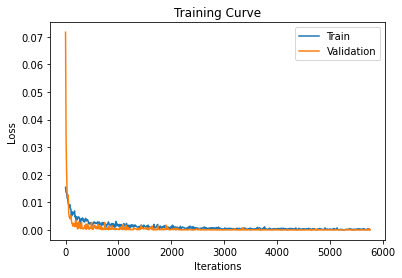

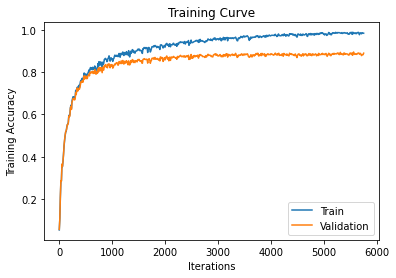

Final Training Accuracy: 0.984963630441863
Final Validation Accuracy: 0.8905053598774885
Final Training Loss: 0.00012595528096426278
Final Validation Loss: 6.647154009442602e-07


In [19]:
#ENTER YOURFOLDER HERE!
%cd /content/drive/'My Drive'/APS360/Project/SignClassifier 
model = SignClassifierNet()
use_cuda = True
if use_cuda and torch.cuda.is_available():
  model.cuda()
  print('CUDA is available!  Training on GPU ...')
else:
  print('CUDA is not available.  Training on CPU ...')
train(model, train_data=alex_train_data, val_data=alex_val_data, num_epochs=20, batch_size=64)